In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("default")


In [ ]:
df = pd.read_csv("land_uk_daily_v2.csv")

df.head()


,date,year,month,day,day_of_year,temp,dewpoint_temp,wind_speed,precipitation,surface_runoff
0,1961-01-01,1961,1,1,1,3.67336,2.07498,4.489435,5.097336,0.145536
1,1961-01-02,1961,1,2,2,3.66230,2.17663,4.753490,10.509815,0.339911
2,1961-01-03,1961,1,3,3,1.80944,0.18316,4.907118,11.650104,0.243362
3,1961-01-04,1961,1,4,4,2.46017,0.17916,4.978218,7.057683,0.148277
4,1961-01-05,1961,1,5,5,1.30547,-0.36810,3.921554,5.822474,0.178550


In [ ]:
df.shape


(23376, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23376 entries, 0 to 23375
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            23376 non-null  object 
 1   year            23376 non-null  int64  
 2   month           23376 non-null  int64  
 3   day             23376 non-null  int64  
 4   day_of_year     23376 non-null  int64  
 5   temp            23376 non-null  float64
 6   dewpoint_temp   23376 non-null  float64
 7   wind_speed      23376 non-null  float64
 8   precipitation   23376 non-null  float64
 9   surface_runoff  23376 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.8+ MB


In [6]:
df.describe()


,year,month,day,day_of_year,temp,dewpoint_temp,wind_speed,precipitation,surface_runoff
count,23376.000000,23376.000000,23376.000000,23376.000000,23376.000000,23376.000000,23376.000000,23376.000000,23376.000000
mean,1992.501027,6.522930,15.729637,183.125257,8.603917,5.585731,4.004417,6.988447,0.203504
std,18.473367,3.448777,8.800280,105.440898,4.794881,4.543454,1.378109,6.291821,0.338193
min,1961.000000,1.000000,1.000000,1.000000,-7.208400,-12.478200,1.259286,0.001738,0.000005
25%,1976.750000,4.000000,8.000000,92.000000,4.936180,2.335208,2.955398,2.033329,0.025324
50%,1992.500000,7.000000,16.000000,183.000000,8.635600,5.740510,3.789627,5.313122,0.085329
75%,2008.250000,10.000000,23.000000,274.000000,12.574000,9.153237,4.834138,10.236551,0.231256
max,2024.000000,12.000000,31.000000,366.000000,23.585750,17.140620,9.923519,57.290340,6.355932


In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df[['date', 'year', 'month']].head()


,date,year,month
0,1961-01-01,1961,1
1,1961-01-02,1961,1
2,1961-01-03,1961,1
3,1961-01-04,1961,1
4,1961-01-05,1961,1


In [ ]:
monthly_df = df.groupby(['year', 'month']).mean().reset_index()

monthly_df.head()


,year,month,date,day,day_of_year,temp,dewpoint_temp,wind_speed,precipitation,surface_runoff
0,1961,1,1961-01-16 00:00:00,16.0,16.0,2.434723,0.622085,4.252304,6.461385,0.213037
1,1961,2,1961-02-14 12:00:00,14.5,45.5,5.693265,3.630586,4.519948,6.277285,0.198630
2,1961,3,1961-03-16 00:00:00,16.0,75.0,7.090844,4.013121,4.298090,3.634951,0.074821
3,1961,4,1961-04-15 12:00:00,15.5,105.5,8.295062,5.397606,3.271359,7.058825,0.123909
4,1961,5,1961-05-16 00:00:00,16.0,136.0,9.715818,5.375655,3.471312,3.541814,0.063128


In [9]:
monthly_df.shape


(768, 10)

In [ ]:
target = 'temp'

monthly_df[target].isnull().sum()


np.int64(0)

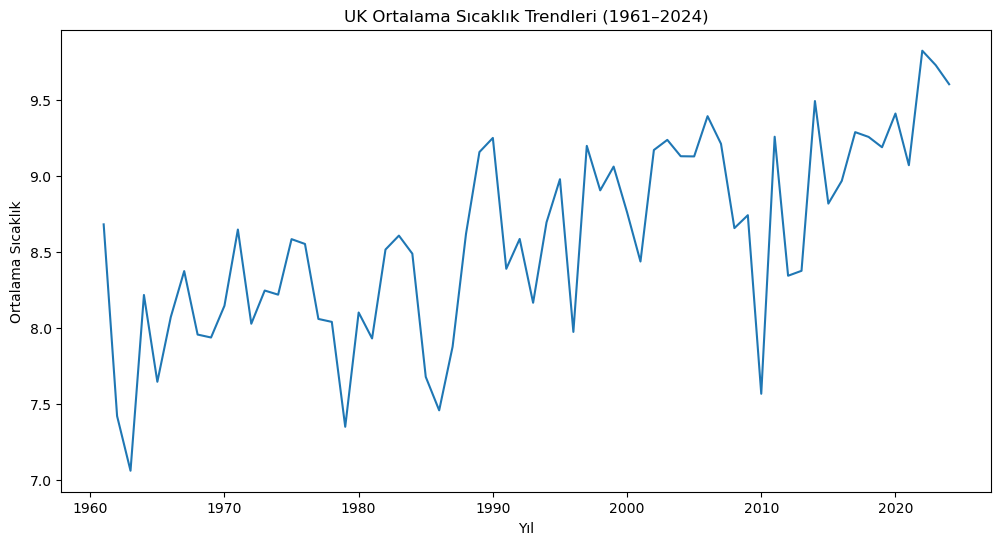

In [ ]:
yearly_temp = monthly_df.groupby('year')[target].mean()

plt.figure(figsize=(12,6))
plt.plot(yearly_temp)
plt.title("UK Ortalama Sıcaklık Trendleri (1961–2024)")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Sıcaklık")
plt.show()


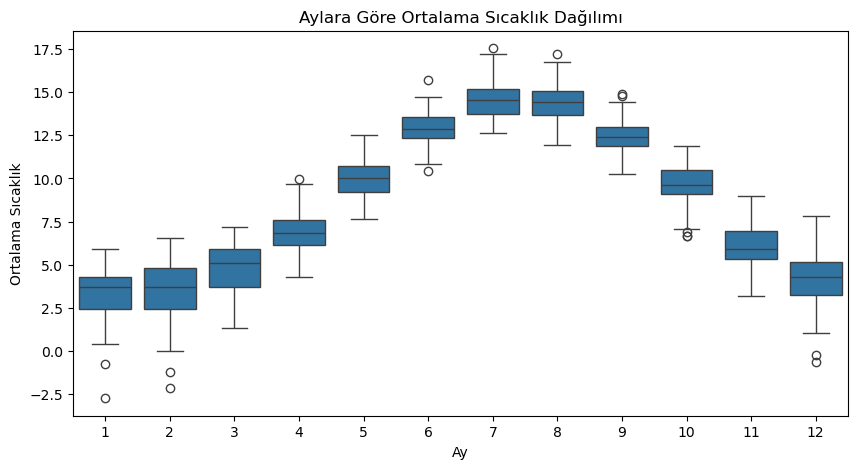

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y=target, data=monthly_df)
plt.title("Aylara Göre Ortalama Sıcaklık Dağılımı")
plt.xlabel("Ay")
plt.ylabel("Ortalama Sıcaklık")
plt.show()


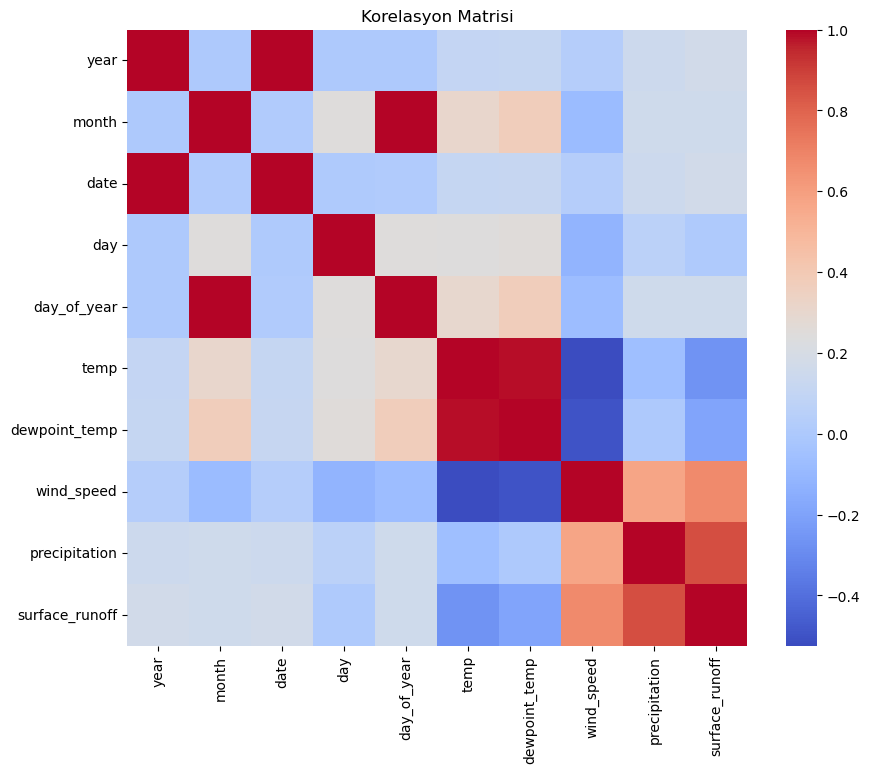

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(monthly_df.corr(), cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


In [ ]:
X = monthly_df.drop(columns=[target], errors='ignore')
y = monthly_df[target]

X.head()


,year,month,date,day,day_of_year,dewpoint_temp,wind_speed,precipitation,surface_runoff
0,1961,1,1961-01-16 00:00:00,16.0,16.0,0.622085,4.252304,6.461385,0.213037
1,1961,2,1961-02-14 12:00:00,14.5,45.5,3.630586,4.519948,6.277285,0.198630
2,1961,3,1961-03-16 00:00:00,16.0,75.0,4.013121,4.298090,3.634951,0.074821
3,1961,4,1961-04-15 12:00:00,15.5,105.5,5.397606,3.271359,7.058825,0.123909
4,1961,5,1961-05-16 00:00:00,16.0,136.0,5.375655,3.471312,3.541814,0.063128


In [24]:
X = monthly_df.drop(columns=[target, 'date'], errors='ignore')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression MSE: 0.17974477703785224
Linear Regression R2: 0.9907570422502401


In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)


Random Forest MSE: 0.15463163606500846
Random Forest R2: 0.9920484272061817


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [mse_lr, mse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

results


,Model,MSE,R2 Score
0,Linear Regression,0.179745,0.990757
1,Random Forest,0.154632,0.992048


In [ ]:
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
4,dewpoint_temp,0.978852
7,surface_runoff,0.006503
3,day_of_year,0.004584
1,month,0.002948
5,wind_speed,0.002659
6,precipitation,0.002215
0,year,0.001427
2,day,0.000813


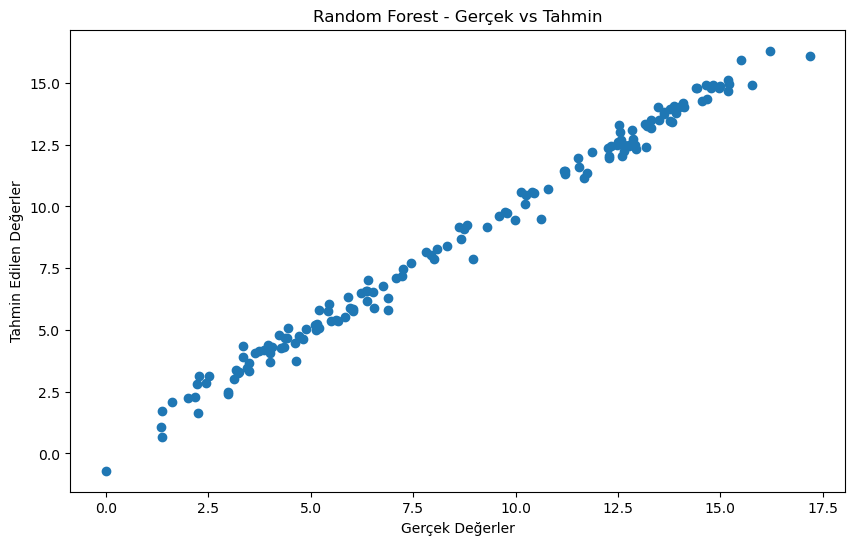

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Random Forest - Gerçek vs Tahmin")
plt.show()


In [31]:
print("Linear Regression R2:", r2_lr)
print("Random Forest R2:", r2_rf)


Linear Regression R2: 0.9907570422502401
Random Forest R2: 0.9920484272061817
